In [2]:
%matplotlib inline
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import collections
from collections import defaultdict
import seaborn as sns
import itertools
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
from sklearn import *

/home/fedorovaad/anaconda3/lib/python3.5/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/home/fedorovaad/anaconda3/lib/python3.5/site-packages/sklearn/qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


In [3]:
#calculate weight for edges in graph
data = pd.read_csv("18_05_new_pvals_adjust_0_1.txt", sep="\t")
data['weight'] = data['n_ab'] / (data['num_a']*data['num_b']/data['n'])
cluster_data = data[['a', 'b', 'weight']]
cluster_data.to_csv("GRAPH_01.txt", sep="\t", index=False)
cluster_data[0:5]

a               b    weight
0   CASSPGIQETQYF  CASSLDPGGETQYF  1.286103
1  CASSVQGGSYEQYF  CASSLDPGGETQYF  1.685884
2   CASSRGSTDTQYF  CASSLDPGGETQYF  1.195442
3  CAWSVGSGANVLTF  CASSLDPGGETQYF  1.501279
4    CASSLSGRGYTF  CASSLDPGGETQYF  1.443738

In [4]:
#allcdr2 = list(set(cluster_data['a'].tolist() + cluster_data['b'].tolist()))
#j = pd.DataFrame(allcdr2)
#j[0:5]
#len(j)
#j.to_csv('graph_publics.txt', sep="\t", header=None, index=False)

In [7]:
allcdr = list(set(cluster_data['a'].tolist() + cluster_data['b'].tolist()))

#make numeric values fir each cdr_aa
vertexes =  pd.DataFrame(allcdr)
vertexes['num'] = vertexes.index
vertexes.columns = ['a', 'numa']

vertexes2 =  pd.DataFrame(allcdr)
vertexes2['num1'] = vertexes2.index
vertexes2.columns = ['b', 'numb']

a_pd = cluster_data.merge(vertexes, on='a', how='inner')
ab_pd = a_pd.merge(vertexes2, on='b', how='inner')
ab_pd[0:5]
cluster_data_num = ab_pd[['numa', 'numb', 'weight']]

cluster_data_num[0:5]

numa  numb    weight
0  1218  2859  1.286103
1   935  2859  1.685884
2  3969  2859  1.195442
3  4482  2859  1.501279
4  6238  2859  1.443738

In [8]:
import scipy.sparse as ss

#make matrix 
def read_data_file_as_coo_matrix(cluster_data_num, wei):
    "Read data file and return sparse matrix in coordinate format."
    rows = cluster_data_num['numa']  # Not a copy, just a reference.
    cols = cluster_data_num['numb']
    if wei == 'custom':
        weight = cluster_data_num['weight']#[1 for x in range(len(cluster_data_num['weight']))]
    #ones = np.ones(len(rows))
    if wei == '1':
        weight = [1 for x in range(len(cluster_data_num['weight']))]
        
    matrix = ss.coo_matrix((weight, (rows, cols))).toarray()
    return matrix

kek = read_data_file_as_coo_matrix(cluster_data_num, 'custom')

#symmetric
def symmetrize(a):
    return a + a.T - np.diag(a.diagonal())

lol = symmetrize(kek)

pd_lol = pd.DataFrame(lol, index = vertexes['a'].tolist())
pd_lol.columns = vertexes['a'].tolist()
pd_lol['cdr'] = pd_lol.index
pd_lol[0:5]

CASSLQGGYEQYF  CASSRQSQETQYF  CASSFRGGSYEQYF  CASSYSRGSYEQYF  \
CASSLQGGYEQYF             0.0            0.0             0.0             0.0   
CASSRQSQETQYF             0.0            0.0             0.0             0.0   
CASSFRGGSYEQYF            0.0            0.0             0.0             0.0   
CASSYSRGSYEQYF            0.0            0.0             0.0             0.0   
CSARTSGSTDTQYF            0.0            0.0             0.0             0.0   

                CSARTSGSTDTQYF  CASSLGRQGYEQYF  CASSLVGGKETQYF  \
CASSLQGGYEQYF              0.0             0.0             0.0   
CASSRQSQETQYF              0.0             0.0             0.0   
CASSFRGGSYEQYF             0.0             0.0             0.0   
CASSYSRGSYEQYF             0.0             0.0             0.0   
CSARTSGSTDTQYF             0.0             0.0             0.0   

                CASSPPGPGANVLTF  CSASRADTQYF  CASSRDRGGQPQHF       ...        \
CASSLQGGYEQYF               0.0          0.0             0.0       ...         
CASSRQSQETQYF               0.0          0.0             0.0       ...         
CASSFRGGSYEQYF              0.0          0.0             0.0       ...         
CASSYSRGSYEQYF              0.0          0.0             0.0       ...         
CSARTSGSTDTQYF              0.0          0.0             0.0       ...         

                CASSLRAATNEKLFF  CASSFSHNEQFF  CSARGGVYGYTF  CASSSQGGNYGYTF  \
CASSLQGGYEQYF               0.0           0.0           0.0             0.0   
CASSRQSQETQYF               0.0           0.0           0.0             0.0   
CASSFRGGSYEQYF              0.0           0.0           0.0             0.0   
CASSYSRGSYEQYF              0.0           0.0           0.0             0.0   
CSARTSGSTDTQYF              0.0           0.0           0.0             0.0   

                CASSQDNEQYF  CASRGQGAGEQYF  CASSPRDRGTEAFF  CASSLGRNYEQYF  \
CASSLQGGYEQYF           0.0       1.199336        1.130263       1.115168   
CASSRQSQETQYF           0.0       0.000000        0.000000       0.000000   
CASSFRGGSYEQYF          0.0       0.000000        0.000000       0.000000   
CASSYSRGSYEQYF          0.0       0.000000        0.000000       1.138548   
CSARTSGSTDTQYF          0.0       0.000000        1.223356       0.000000   

                CSVVSGANVLTF             cdr  
CASSLQGGYEQYF            0.0   CASSLQGGYEQYF  
CASSRQSQETQYF            0.0   CASSRQSQETQYF  
CASSFRGGSYEQYF           0.0  CASSFRGGSYEQYF  
CASSYSRGSYEQYF           0.0  CASSYSRGSYEQYF  
CSARTSGSTDTQYF           0.0  CSARTSGSTDTQYF  

[5 rows x 9999 columns]

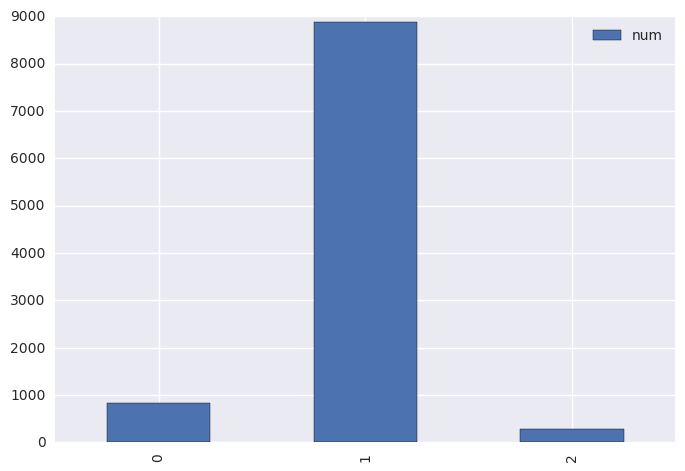

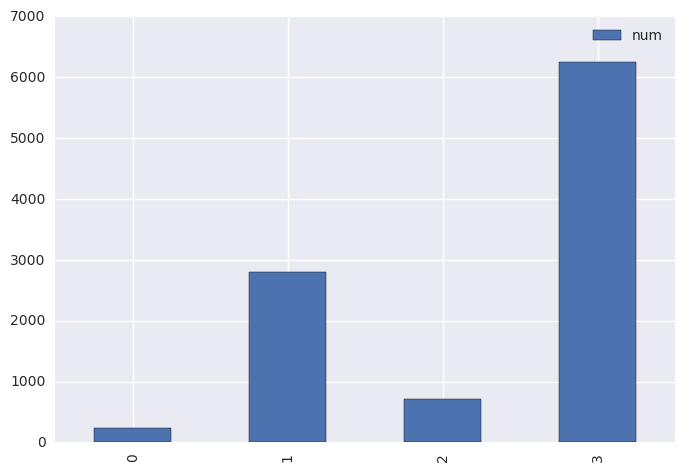

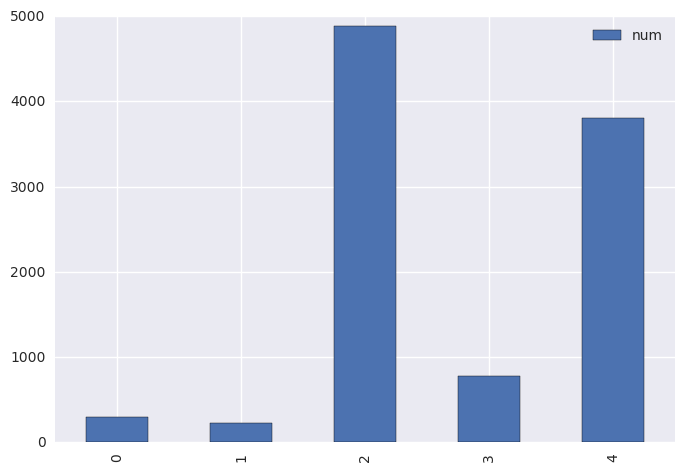

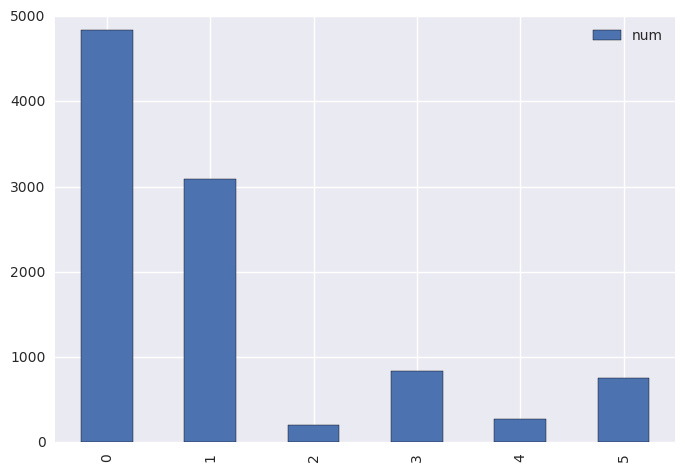

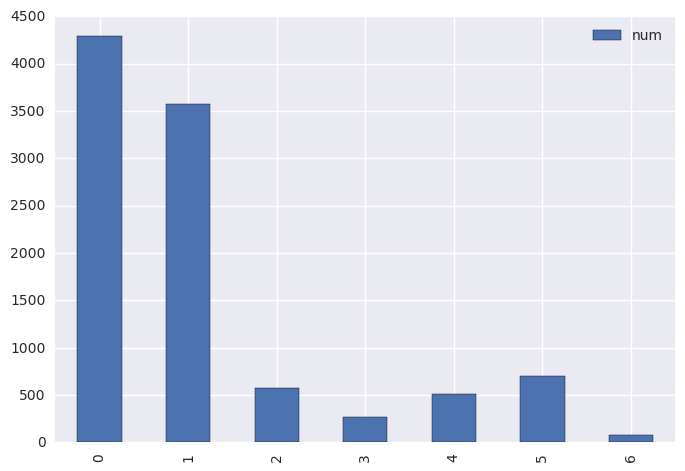

In [6]:
from functools import *
for el in [3, 4,5, 6, 7]:
    clustering = cluster.SpectralClustering(el, affinity='precomputed',eigen_solver='arpack')
    #clustering.fit(pd_lol.ix[:, 0:-1])
    clusters = clustering.fit_predict(pd_lol.ix[:, 0:-1])
    n = len(set(list(clusters)))
    classes = []
    for k in range(n):
        indices = [i for i, x in enumerate(clusters) if x == k]
        cla = pd.DataFrame(indices)
        cla['class'] = k
        cla.columns = ['num', 'class']
        classes.append(cla)
    kik = reduce(lambda x, y: pd.concat([x, y]), classes)
    kik2 = kik.groupby(['class']).count().reset_index()
    kik2[['num']].plot(kind='bar')

# 7 CLUSTERS

In [9]:
from functools import *
clustering = cluster.SpectralClustering(7, affinity='precomputed',eigen_solver='arpack')
clusters = clustering.fit_predict(pd_lol.ix[:, 0:-1])

classes=[]
for k in range(7):
    indices = [i for i, x in enumerate(clusters) if x == k]
    cla = pd.DataFrame(indices)
    cla['class'] = k
    cla.columns = ['num', 'class']
    classes.append(cla)
    
kik = reduce(lambda x, y: pd.concat([x, y]), classes)    

vertexes3 =  pd.DataFrame(allcdr)
vertexes3['num'] = vertexes.index
vertexes3.columns = ['cdr', 'num']

vert_class = vertexes3.merge(kik, on='num', how='inner')
vert_class[0:5]

cdr  num  class
0   CASSLQGGYEQYF    0      2
1   CASSRQSQETQYF    1      5
2  CASSFRGGSYEQYF    2      5
3  CASSYSRGSYEQYF    3      2
4  CSARTSGSTDTQYF    4      6

In [5]:
#vert_class[(vert_class['class'] != '1') | (vert_class['class'] != '5')].to_csv('vert_class_02346.txt', sep="\t", index=False)

# V-usage - JS distance

In [24]:
VdeneD2 = pd.read_csv("ALL_VGENES_D2_MAX2.txt", sep="\t")

In [25]:
VdeneD2[0:5]

cdr         v  count
0   CSVEVWDSNYNEQYF  TRBV29-1    999
1  CSGRGSGLSSYNEQFF  TRBV20-1    998
2   CASSAGARNYNEQFF  TRBV12-4    998
3   CASSLVGRGAHEQYF   TRBV7-9    998
4   CASSRGRRSYNEQFF   TRBV5-1   9970

In [26]:
Vgene_clusters = vert_class.merge(VdeneD2[['cdr', 'v']], on='cdr', how='inner')

In [27]:
Vgene_clusters[0:5]

cdr  num  class         v
0   CASSLQGGYEQYF    0      2   TRBV7-3
1   CASSRQSQETQYF    1      5  TRBV12-3
2  CASSFRGGSYEQYF    2      5  TRBV12-3
3  CASSYSRGSYEQYF    3      2   TRBV6-5
4  CSARTSGSTDTQYF    4      6  TRBV29-1

In [28]:
len(Vgene_clusters)

9991

In [35]:
Vgene_clusters['count'] = 1
new = pd.DataFrame(Vgene_clusters.groupby(by=['v', 'class'])['count'].sum()).reset_index()
new1 = new.pivot_table(index=['class'], columns='v').reset_index()
new1.columns = new1.columns.droplevel()
new2 = new1.fillna(value=0)
new2.columns = ['cluster']+ list(filter(None, new2.columns.tolist()))
new2 = new2.set_index('cluster')
new2.index.name = None
new3 = new2.div(new2.sum(axis=1), axis=0)
new3[0:5]

TRBV10-1  TRBV10-2  TRBV10-3  TRBV11-1  TRBV11-2  TRBV11-3  TRBV12-3  \
0  0.002217  0.004435  0.000000  0.002217  0.004435  0.002217  0.053215   
1  0.001856  0.004175  0.004639  0.003711  0.016469  0.002784  0.053352   
2  0.003497  0.000000  0.000000  0.000000  0.024476  0.006993  0.052448   
3  0.001761  0.003521  0.000000  0.007042  0.017606  0.008803  0.049296   
4  0.002717  0.005435  0.000000  0.004076  0.019022  0.002717  0.063859   

   TRBV12-4  TRBV12-5    TRBV13    ...      TRBV6-5   TRBV6-6   TRBV6-7  \
0  0.082040  0.000000  0.011086    ...     0.031042  0.019956  0.000000   
1  0.069357  0.001160  0.006959    ...     0.032707  0.018093  0.000232   
2  0.059441  0.000000  0.010490    ...     0.013986  0.020979  0.000000   
3  0.068662  0.003521  0.008803    ...     0.014085  0.012324  0.000000   
4  0.084239  0.000000  0.008152    ...     0.027174  0.025815  0.000000   

    TRBV7-2   TRBV7-3   TRBV7-6   TRBV7-7   TRBV7-8   TRBV7-9     TRBV9  
0  0.126386  0.039911  0.006652  0.002217  0.015521  0.066519  0.042129  
1  0.116678  0.028300  0.012526  0.004639  0.012062  0.060775  0.029691  
2  0.125874  0.045455  0.003497  0.000000  0.020979  0.101399  0.045455  
3  0.177817  0.042254  0.007042  0.007042  0.022887  0.051056  0.035211  
4  0.123641  0.047554  0.004076  0.004076  0.016304  0.076087  0.017663  

[5 rows x 47 columns]

In [40]:
len(new3.columns)

47

In [43]:
len(a[0])

47

In [ ]:
a = new3.ix[:, 0:].as_matrix()
#a

In [44]:
import math
#from dit.divergences import jensen_shannon_divergence
from scipy.stats import entropy
from numpy.linalg import norm
import numpy as np

#cdr - max V
#jensen-shannon metric
def JSD(P, Q):
    _P = P / norm(P, ord=1)
    _Q = Q / norm(Q, ord=1)
    _M = 0.5 * (_P + _Q)
    return 0.5 * (entropy(_P, _M) + entropy(_Q, _M))


#distance matrix
def dist(a):
    items = a.shape[0] #(466, 279) --> 466
    out = np.ones((items,items)) #
    for j in range(items):
        for k in range(j+1, items):
            out[j, k] = JSD(a[j], a[k])
            out[k, j] = out[j, k]
    return out

b = dist(a)
b

array([[ 1.        ,  0.03117111,  0.05961686,  0.04220835,  0.03724085,
         0.03195865,  0.09940102],
       [ 0.03117111,  1.        ,  0.05595906,  0.02410845,  0.02305921,
         0.00311005,  0.09200501],
       [ 0.05961686,  0.05595906,  1.        ,  0.05068354,  0.0378878 ,
         0.05551816,  0.13251164],
       [ 0.04220835,  0.02410845,  0.05068354,  1.        ,  0.03026149,
         0.02557347,  0.08992191],
       [ 0.03724085,  0.02305921,  0.0378878 ,  0.03026149,  1.        ,
         0.02493318,  0.10461462],
       [ 0.03195865,  0.00311005,  0.05551816,  0.02557347,  0.02493318,
         1.        ,  0.09947468],
       [ 0.09940102,  0.09200501,  0.13251164,  0.08992191,  0.10461462,
         0.09947468,  1.        ]])

In [50]:
distance_JS = pd.DataFrame(1-b, index = new3.index.tolist())
distance_JS

0         1         2         3         4         5         6
0  0.000000  0.968829  0.940383  0.957792  0.962759  0.968041  0.900599
1  0.968829  0.000000  0.944041  0.975892  0.976941  0.996890  0.907995
2  0.940383  0.944041  0.000000  0.949316  0.962112  0.944482  0.867488
3  0.957792  0.975892  0.949316  0.000000  0.969739  0.974427  0.910078
4  0.962759  0.976941  0.962112  0.969739  0.000000  0.975067  0.895385
5  0.968041  0.996890  0.944482  0.974427  0.975067  0.000000  0.900525
6  0.900599  0.907995  0.867488  0.910078  0.895385  0.900525  0.000000

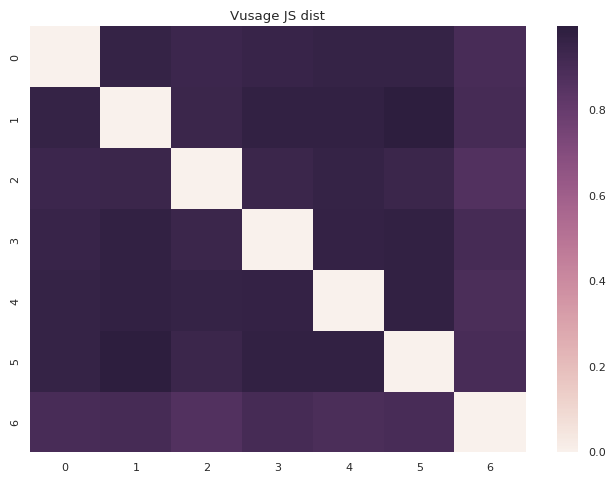

In [76]:
sns.set(font_scale=0.8)
sns.set(font_scale=0.8)
ax = plt.axes()
sns.heatmap(distance_JS, ax = ax)
ax.set_title('Vusage JS dist')
plt.show()

# DIST LENGTH JS DIST

In [62]:
def leng(vert_class):
    return len(vert_class['cdr'])

vert_class['length'] = vert_class.apply(leng, axis=1)
vert_class['count'] = 1
leng = pd.DataFrame(vert_class.groupby(by=['class', 'length'])['count'].sum()).reset_index()
leng1 = leng.pivot_table(index=['class'], columns='length').reset_index()
leng1.columns = leng1.columns.droplevel()
leng2 = leng1.fillna(value=0)
leng2.columns = ['cluster'] + list(filter(None, leng1.columns.tolist()))
leng2 = leng2.set_index('cluster')
leng2.index.name = None
leng3 = leng2.div(leng2.sum(axis=1), axis=0)
leng3

7         8         9         10        11        12        13  \
0  0.000000  0.000000  0.000000  0.004425  0.024336  0.119469  0.168142   
1  0.000232  0.000000  0.000696  0.007651  0.056341  0.142824  0.273128   
2  0.000000  0.000000  0.000000  0.017483  0.090909  0.206294  0.332168   
3  0.000000  0.000000  0.000000  0.010545  0.049209  0.080844  0.161687   
4  0.000000  0.001359  0.001359  0.005435  0.059783  0.179348  0.346467   
5  0.000000  0.000000  0.001124  0.008994  0.059584  0.135750  0.283586   
6  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.083333   

         14        15        16        17        18  
0  0.334071  0.280973  0.064159  0.004425  0.000000  
1  0.302574  0.179689  0.033851  0.002782  0.000232  
2  0.251748  0.101399  0.000000  0.000000  0.000000  
3  0.275923  0.316344  0.098418  0.007030  0.000000  
4  0.293478  0.104620  0.008152  0.000000  0.000000  
5  0.301012  0.179595  0.028387  0.001686  0.000281  
6  0.214286  0.559524  0.130952  0.011905  0.000000

In [66]:
a1 = leng3.ix[:, :].as_matrix()
b1 = dist(a1)
distance_JS1 = pd.DataFrame(1-b1, index = leng3.index.tolist())
distance_JS1

0         1         2         3         4         5         6
0  0.000000  0.980813  0.919523  0.991426  0.940934  0.977658  0.904497
1  0.980813  0.000000  0.972833  0.969247  0.985745  0.999560  0.829511
2  0.919523  0.972833  0.000000  0.901378  0.991590  0.975521  0.713369
3  0.991426  0.969247  0.901378  0.000000  0.918648  0.966330  0.924376
4  0.940934  0.985745  0.991590  0.918648  0.000000  0.987542  0.745570
5  0.977658  0.999560  0.975521  0.966330  0.987542  0.000000  0.824866
6  0.904497  0.829511  0.713369  0.924376  0.745570  0.824866  0.000000

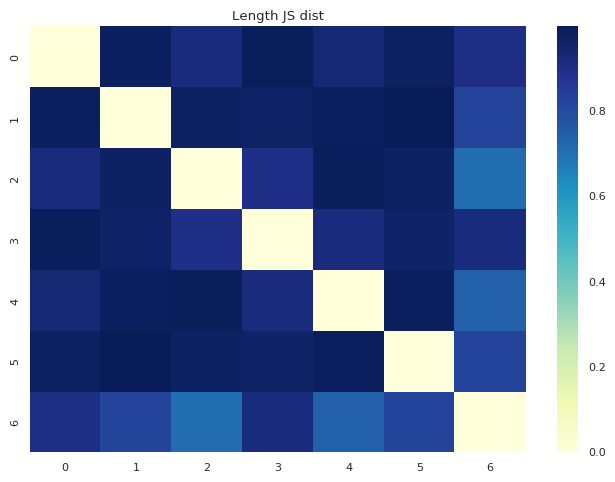

In [77]:
sns.set(font_scale=0.8)
ax = plt.axes()
sns.heatmap(distance_JS1, ax = ax, cmap="YlGnBu")
ax.set_title('Length JS dist')
plt.show()

# COORD BLOOD MARKERS  FOR  tSNE

In [78]:
#cord blood
meta_full = pd.read_csv("/bulk/analysis/Aging/preproc/cdrblast/metadata_full.txt", sep="\t")
cord = meta_full[meta_full['age'] == 0]

cord_sp = []
for el in cord['#file_name'].tolist():
    with open('public-tcr/D2/'+el, 'r') as f:
        #print ('/bulk/analysis/Aging/preproc/cdrblast/'+el)
        for l in f.readlines():
            l1 = l.split("\t")
            if l.find('count') == -1:
                cord_sp.append(l1[3])       

In [83]:
cord = pd.DataFrame(cord_sp)
cord['cord'] = 1
cord.columns = ['cdr', 'cord']
cord[0:3]

cdr  cord
0  CASSLGTGGYEQYF     1
1    CASSPGTDTQYF     1
2      CASSQETQYF     1

In [84]:
vert_class_cord = vert_class.merge(cord, on='cdr', how='left')

In [89]:
vert_class_cord1 = vert_class_cord.drop_duplicates()

In [98]:
vert_class_cord2 = vert_class_cord1.fillna(0)

In [141]:
vert_class_cord2[0:5]

cdr  num  class  length  count  cord
0   CASSLQGGYEQYF    0      2      13      1   1.0
2   CASSRQSQETQYF    1      5      13      1   1.0
3  CASSFRGGSYEQYF    2      5      14      1   1.0
4  CASSYSRGSYEQYF    3      2      14      1   1.0
6  CSARTSGSTDTQYF    4      6      14      1   1.0

In [127]:
cord1 = vert_class_cord2[vert_class_cord2['cord'] == 1]['num'].tolist()
cord0 = vert_class_cord2[vert_class_cord2['cord'] == 0]['num'].tolist()

In [142]:
color1 = vert_class_cord2[vert_class_cord2['cord'] == 1]['class'].tolist()
color0 = vert_class_cord2[vert_class_cord2['cord'] == 0]['class'].tolist()

In [144]:
color0[0:5]

[5, 1, 5, 5, 4]

# tSNE

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

matr = np.matrix(pd_lol.drop(['cdr'], axis=1))
matr[0:5]

matrix([[ 0.        ,  0.        ,  0.        , ...,  1.13026265,
          1.11516829,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          1.1385482 ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  1.22335609,
          0.        ,  0.        ]])

In [105]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE


X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(matr)

In [106]:
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 9998
[t-SNE] Computed conditional probabilities for sample 2000 / 9998
[t-SNE] Computed conditional probabilities for sample 3000 / 9998
[t-SNE] Computed conditional probabilities for sample 4000 / 9998
[t-SNE] Computed conditional probabilities for sample 5000 / 9998
[t-SNE] Computed conditional probabilities for sample 6000 / 9998
[t-SNE] Computed conditional probabilities for sample 7000 / 9998
[t-SNE] Computed conditional probabilities for sample 8000 / 9998
[t-SNE] Computed conditional probabilities for sample 9000 / 9998
[t-SNE] Computed conditional probabilities for sample 9998 / 9998
[t-SNE] Mean sigma: 0.368249
[t-SNE] Iteration 25: error = 0.6190602, gradient norm = 0.0004628
[t-SNE] Iteration 25: gradient norm 0.000463. Finished.
[t-SNE] Iteration 50: error = 0.6126899, gradient norm = 0.0035593
[t-SNE] Iteration 75: error = 0.610650

In [29]:
vert_class[0:5]

cdr  num  class
0    CASSLDLDEQFF    0      1
1    CSAPSSTDTQYF    1      5
2   CASSLVARETQYF    2      5
3  CASSLRDRLYEQYF    3      1
4   CASSSGTGRGYTF    4      5

In [109]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/fedorovaad/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cla', 'entropy', 'indices', 'colors', 'dist', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [31]:
len(X_embedded)

9998

In [110]:
colors1 = []
colors = vert_class['class'].tolist()
for el in colors:
    if el == 0:
        colors1.append('red')
    elif el == 1:
        colors1.append('orange')
    elif el == 2:
        colors1.append('yellow')
    elif el == 3:
        colors1.append('purple')
    elif el == 4:
        colors1.append('green')
    elif el == 5:
        colors1.append('cyan')
    else:
        colors1.append('grey')

colors1[0:5]              

['yellow', 'cyan', 'cyan', 'yellow', 'grey']

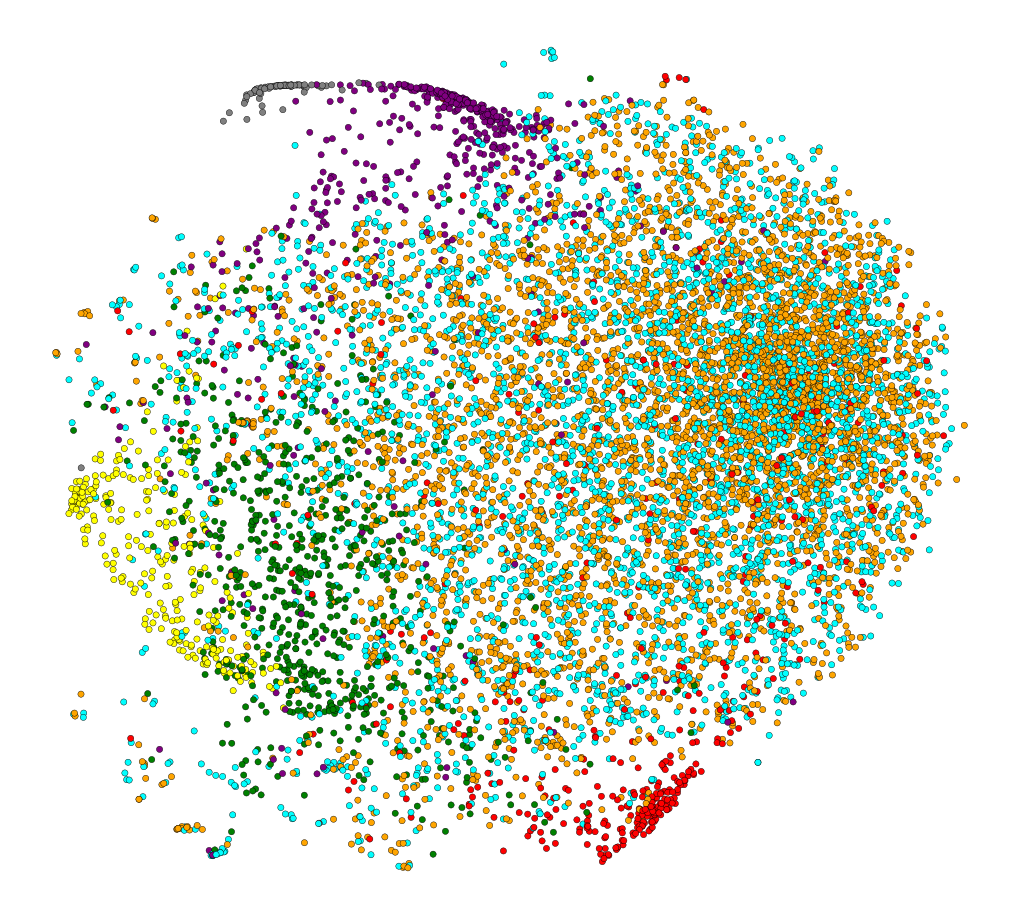

In [140]:
fig = figure(figsize=(10, 10))
ax = axes(frameon=False)
setp(ax, xticks=(), yticks=())
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
scatter(X_embedded[:, 0], X_embedded[:, 1],  c=colors1)

In [128]:
X_embedded

array([[-2.19263446, -0.63900373],
       [ 1.16657022,  0.99642479],
       [-0.01064232,  3.40354598],
       ..., 
       [-1.05859018, -1.70297912],
       [-2.97486395,  0.89127966],
       [ 5.74760838, -0.76551003]])

In [135]:
X_embedded_cord1 = np.array([list(X_embedded[i]) for i in cord1])
X_embedded_cord0 = np.array([list(X_embedded[i]) for i in cord0])

In [136]:
X_embedded_cord1

array([[-2.19263446, -0.63900373],
       [ 1.16657022,  0.99642479],
       [-0.01064232,  3.40354598],
       ..., 
       [ 6.34377106,  1.02128418],
       [ 5.9823122 ,  2.19174101],
       [-2.97486395,  0.89127966]])

In [148]:
#colors0
#colors1

def color(colors):
    col = []
    for el in colors:
        if el == 0:
            col.append('red')
        elif el == 1:
            col.append('orange')
        elif el == 2:
            col.append('yellow')
        elif el == 3:
            col.append('purple')
        elif el == 4:
            col.append('green')
        elif el == 5:
            col.append('cyan')
        else:
            col.append('grey')
    return (col)


mark1 = color(color1)
mark0 = color(color0)
len(mark1+mark0)

9998

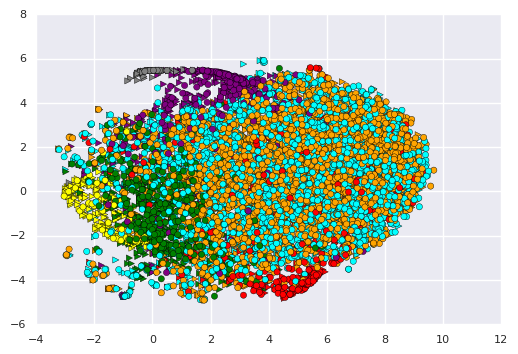

In [149]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(X_embedded_cord1[:, 0], X_embedded_cord1[:, 1], marker = '>', c=mark1)
plt.scatter(X_embedded_cord0[:, 0], X_embedded_cord0[:, 1], marker = 'o', c=mark0)
plt.show()

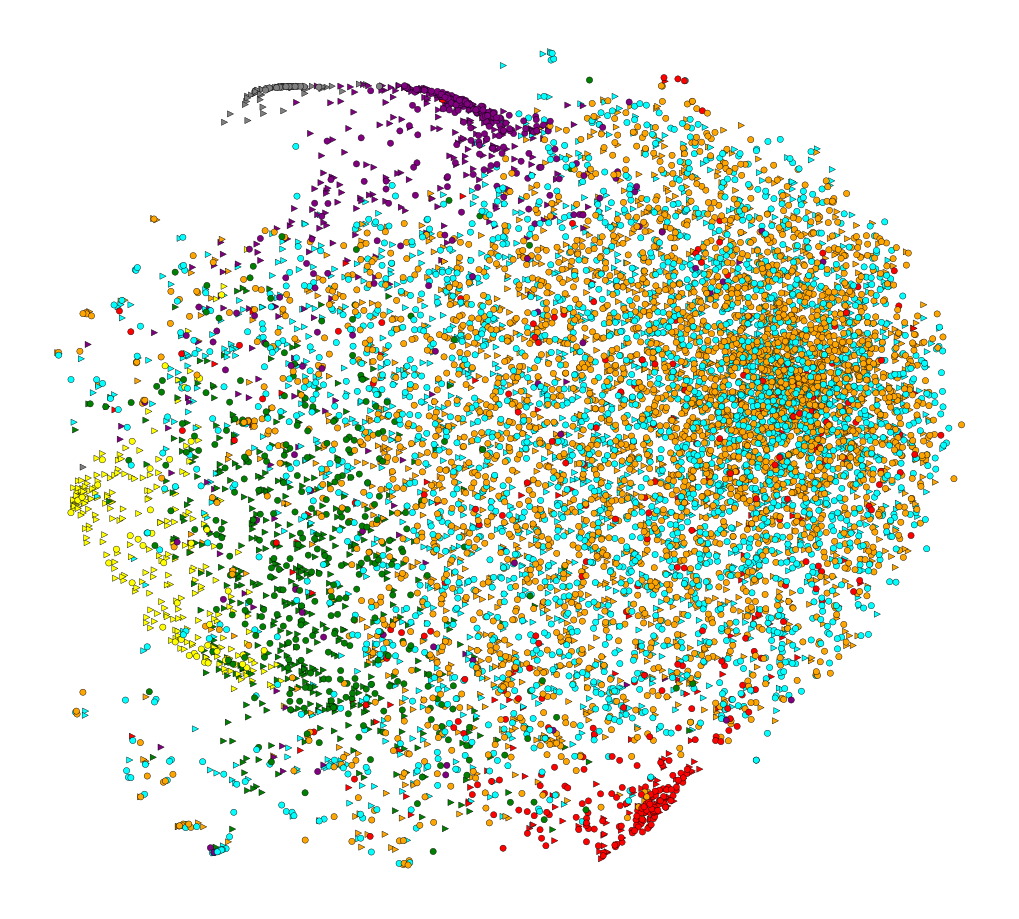

In [150]:
fig = figure(figsize=(10, 10))
ax = axes(frameon=False)
setp(ax, xticks=(), yticks=())
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
scatter(X_embedded_cord1[:, 0], X_embedded_cord1[:, 1], marker = '>', c=mark1)
scatter(X_embedded_cord0[:, 0], X_embedded_cord0[:, 1], marker = 'o', c=mark0)

# TAKE DATA CDR FROM MAGENTA RED GREEN YELLOW GREY CLUSTERS

In [168]:

select = vert_class[(vert_class['class'] != 1) & (vert_class['class'] != 5)]
select1 = select[['cdr', 'class']]
select1.columns = ['CDR3aa', 'class']
select1.to_csv('vert_class_cdr.txt', sep="\t", index=None)
select1[0:2]

CDR3aa  class
0   CASSLQGGYEQYF      2
3  CASSYSRGSYEQYF      2

In [177]:
vdj = pd.read_csv('VDJtools_publics.txt', sep="\t")
vdj[0:5]

count  frequency                                         CDR3nt  \
0     99   0.000017     TGTGCCAGCAGCTTAGATCGGGGATCAGATACGCAGTATTTT   
1     99   0.000065  TGTGCCAGCAGCTTAATGAGGGGGGGCACAGATACGCAGTATTTT   
2     99   0.000066                    TGCAGCGTGGGGGATACGCAGTATTTT   
3     99   0.000031     TGTGCCAGCAGTTTAGGACGCGGCGGGGAGACCCAGTACTTC   
4     99   0.000098           TGTGCCAGCAGCCCTCTAGACTACGAGCAGTACTTC   

            CDR3aa                   V        D             J  
0   CASSLDRGSDTQYF            TRBV11-2  TRBJ2-3         TRBD2  
1  CASSLMRGGTDTQYF             TRBV7-2  TRBJ2-3  TRBD1, TRBD2  
2        CSVGDTQYF            TRBV29-1  TRBJ2-3  TRBD1, TRBD2  
3   CASSLGRGGETQYF  TRBV12-4, TRBV12-3  TRBJ2-5         TRBD2  
4     CASSPLDYEQYF  TRBV12-4, TRBV12-3  TRBJ2-7         TRBD2

In [178]:
len(vdj)

9991

In [179]:
cl0 = select1[select1['class'] == 0].merge(vdj, on='CDR3aa', how='inner')[['count', 'frequency', 'CDR3nt', "CDR3aa", 'V', 'D', 'J']]
cl2 = select1[select1['class'] == 2].merge(vdj, on='CDR3aa', how='inner')[['count', 'frequency', 'CDR3nt', "CDR3aa", 'V', 'D', 'J']]
cl3 = select1[select1['class'] == 3].merge(vdj, on='CDR3aa', how='inner')[['count', 'frequency', 'CDR3nt', "CDR3aa", 'V', 'D', 'J']]
cl4 = select1[select1['class'] == 4].merge(vdj, on='CDR3aa', how='inner')[['count', 'frequency', 'CDR3nt', "CDR3aa", 'V', 'D', 'J']]
cl6 = select1[select1['class'] == 6].merge(vdj, on='CDR3aa', how='inner')[['count', 'frequency', 'CDR3nt', "CDR3aa", 'V', 'D', 'J']]

In [180]:
cl0.to_csv('clust0.txt', sep="\t", index=False)
cl2.to_csv('clust2.txt', sep="\t", index=False)
cl3.to_csv('clust3.txt', sep="\t", index=False)
cl4.to_csv('clust4.txt', sep="\t", index=False)
cl6.to_csv('clust6.txt', sep="\t", index=False)

In [181]:
len(cl0)  #451 286 568 736 84

451

In [182]:
len(cl2)

286

In [183]:
len(cl3)

568

In [184]:
len(cl4)

736

In [185]:
len(cl6)

84

In [164]:
a =  open('metadata2.txt', 'w')
a.write('#file.name\tsample.id\n')
a.write('clust0.txt\tclust0\n')
a.write('clust2.txt\tclust2\n')
a.write('clust3.txt\tclust3\n')
a.write('clust4.txt\tclust4\n')
a.write('clust6.txt\tclust6\n')
a.close()

In [ ]:
java -jar vdjtools-1.1.4.jar CalcSegmentUsage \ -p -m metadata2.txt out2/

In [ ]:
java -jar vdjtools-1.1.4.jar PlotFancySpectratype -p clist0.txt out2/cl0

java -jar vdjtools-1.1.4.jar PlotFancySpectratype -p clist0.txt out2/cl0

java -jar vdjtools-1.1.4.jar PlotFancySpectratype -p clist0.txt out2/cl0

java -jar vdjtools-1.1.4.jar PlotFancySpectratype -p clist0.txt out2/cl0

java -jar vdjtools-1.1.4.jar PlotFancySpectratype -p clist0.txt out2/cl0

# HLA FOR SELECT CLUSTERS

In [237]:
select_ = select[['cdr', 'class']]
select_.columns = ['cdr', 'cluster']
select_[0:3]

cdr  cluster
0   CASSLQGGYEQYF        2
3  CASSYSRGSYEQYF        2
4  CSARTSGSTDTQYF        6

In [239]:
#allcdr = select_['cdr'].tolist()

In [220]:
#make hla table
tmp = pd.read_csv('HLA_cdr.txt', sep="\t")
tmp[0:3]

cdr              hla
0  CASSVRDRGTEAFF  A33,A32,B14,B51
1   CASSPGWGQPQHF  A33,A32,B14,B51
2  CASSLDLNTGELFF  A33,A32,B14,B51

In [222]:
cdr1= cdr.merge(tmp, on='cdr', how='inner')

In [223]:
len(set(cdr1['cdr'].tolist()))

2127

In [224]:
cdr1[0:4]

cdr              hla
0  CASSLQGGYEQYF  A33,A32,B14,B51
1  CASSLQGGYEQYF     A2,A2,B7,B60
2  CASSLQGGYEQYF    A24,A1,B7,B37
3  CASSLQGGYEQYF     A2,A1,B27,B8

In [ ]:
#

In [229]:
hlas = defaultdict(list)
hlas2 = open('HLAs_new_02346.txt', 'w')
cdr1.to_csv("new_hla.txt", sep="\t", index=False, header=None)

with open('new_hla.txt', 'r') as f:
    for l in f.readlines():
        l1 = l.split("\t")
        cdr = l1[0]
        hla =  l1[1].strip().split(",") #list(filter(None, set(l1[1].strip().split(","))))
        for el in hla:
            hlas[cdr].append(el)  

In [231]:
for k,v in hlas.items():
    for el in list(filter(None, list(set(v)))):
        hlas2.write(k+"\t"+el+"\n")
        
hlas2.close()    

In [235]:
hlas3 = pd.read_csv('HLAs_new_02346.txt', sep="\t", header=None)
hlas3.columns = ['cdr', 'hla']
hlas4 = hlas3.drop_duplicates()
hlas4[0:5]

cdr  hla
0  CASSLGLAGFYEQYF  B14
1  CASSLGLAGFYEQYF  B57
2  CASSLGLAGFYEQYF  B18
3  CASSLGLAGFYEQYF  B35
4  CASSLGLAGFYEQYF  A23

In [257]:
hlas_5 = hlas4.merge(select_, on='cdr', how='inner')
hlas5 = hlas_5.drop_duplicates()

In [258]:
len(hlas4)

102380

In [259]:
len(hlas5)

102380

In [260]:
hlas5[0:5]

cdr  hla  cluster
0  CASSLGLAGFYEQYF  B14        3
1  CASSLGLAGFYEQYF  B57        3
2  CASSLGLAGFYEQYF  B18        3
3  CASSLGLAGFYEQYF  B35        3
4  CASSLGLAGFYEQYF  A23        3

In [261]:
hlas5['count'] = 1
new = pd.DataFrame(hlas5.groupby(by=['hla', 'cluster'])['count'].sum()).reset_index()
new1 = new.pivot_table(index=['cluster'], columns='hla').reset_index()
new1.columns = new1.columns.droplevel()
new1.columns = ['cluster'] + list(filter(None, list(new1.columns)))
new2 = new1.set_index('cluster')
new2.index.name = None
new3 = new2.div(new2.max(axis=1), axis=0)
new3

A1  A11   A2       A23  A24       A25       A26       A28       A29   A3  \
0  1.0  1.0  1.0  0.966814  1.0  0.969027  0.997788  0.230088  0.995575  1.0   
2  1.0  1.0  1.0  1.000000  1.0  1.000000  1.000000  0.765734  1.000000  1.0   
3  1.0  1.0  1.0  0.989455  1.0  0.970123  1.000000  0.279438  0.996485  1.0   
4  1.0  1.0  1.0  1.000000  1.0  1.000000  1.000000  0.535326  1.000000  1.0   
6  1.0  1.0  1.0  0.988095  1.0  0.976190  1.000000  0.440476  1.000000  1.0   

     ...          B61       B62       B63   B7       B70       B73       B75  \
0    ...     0.798673  0.984513  0.581858  1.0  0.294248  0.347345  0.192478   
2    ...     0.996503  1.000000  0.965035  1.0  0.884615  0.902098  0.699301   
3    ...     0.843585  0.992970  0.692443  1.0  0.514938  0.511424  0.239016   
4    ...     0.978261  1.000000  0.925272  1.0  0.763587  0.714674  0.451087   
6    ...     0.928571  1.000000  0.892857  1.0  0.761905  0.714286  0.380952   

        B78   B8       B82  
0  0.119469  1.0  0.119469  
2  0.772727  1.0  0.772727  
3  0.391916  1.0  0.391916  
4  0.591033  1.0  0.591033  
6  0.642857  1.0  0.642857  

[5 rows x 60 columns]

In [265]:
hlas5[0:5]
tmp10 = hlas5.groupby(['cluster', 'hla']).count().reset_index()
tmp10[0:5]

cluster  hla  cdr  count
0        0   A1  452    452
1        0  A11  452    452
2        0   A2  452    452
3        0  A23  437    437
4        0  A24  452    452

In [279]:
def div(s):  ##451 286 568 736 84
    if s['cluster'] == 0:
        return s['count']/452
    
    if s['cluster'] == 2:
        return s['count']/287
    
    if s['cluster'] == 3:
        return s['count']/569
    
    if s['cluster'] == 4:
        return s['count']/736

    if s['cluster'] == 6:
        return s['count']/85
    

tmp10['count1'] = tmp10.apply(div, axis=1)
tmp10[tmp10['count1'] > 1]

Empty DataFrame
Columns: [cluster, hla, cdr, count, count1]
Index: []

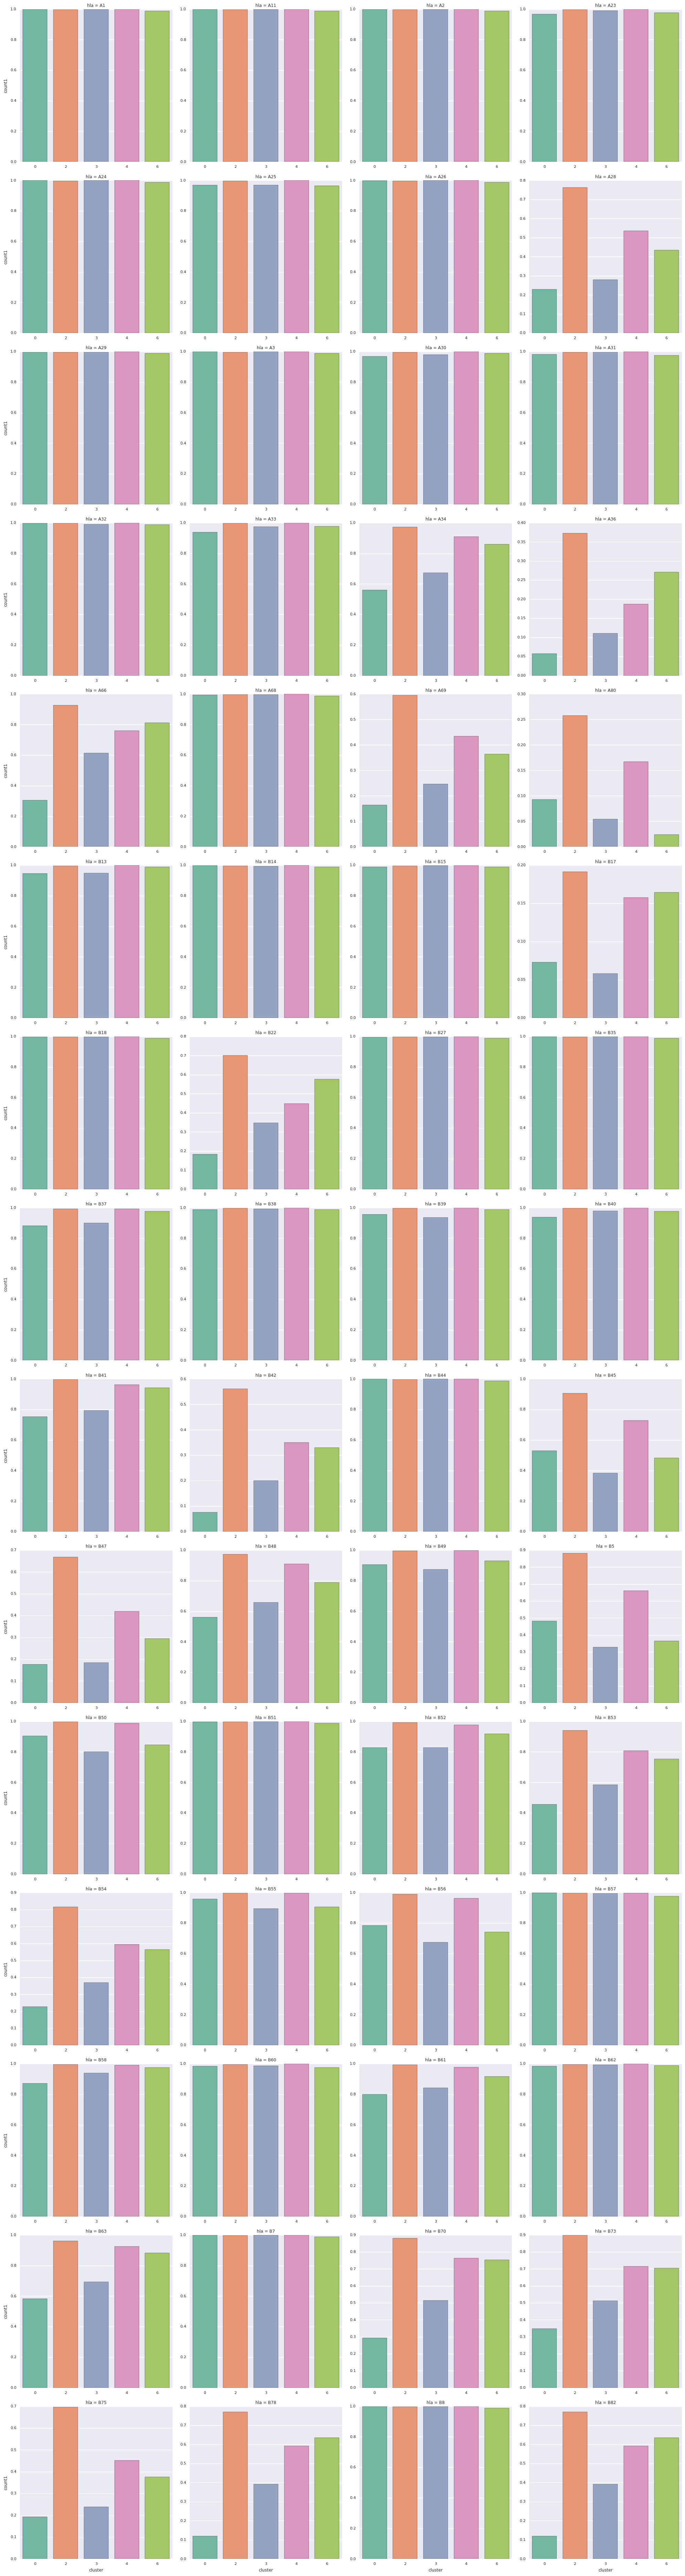

In [274]:
grid8 = sns.FacetGrid(tmp10, col="hla", col_wrap=4, size=5, margin_titles=True, sharex=False, sharey=False)
grid8.map(sns.barplot, "cluster", "count1", palette='Set2')
grid8.fig.tight_layout(w_pad=3)
grid8.fig.subplots_adjust()
plt.tight_layout()

# CORD BLOOD %

In [280]:
vert_class[0:4]

cdr  num  class  length  count
0   CASSLQGGYEQYF    0      2      13      1
1   CASSRQSQETQYF    1      5      13      1
2  CASSFRGGSYEQYF    2      5      14      1
3  CASSYSRGSYEQYF    3      2      14      1

In [283]:
vert_class_cord2[0:4]

cdr  num  class  length  count  cord
0   CASSLQGGYEQYF    0      2      13      1   1.0
2   CASSRQSQETQYF    1      5      13      1   1.0
3  CASSFRGGSYEQYF    2      5      14      1   1.0
4  CASSYSRGSYEQYF    3      2      14      1   1.0

In [290]:
len(vert_class_cord2[vert_class_cord2['class'] == 1])

4313

In [292]:
cord_percent = pd.DataFrame(vert_class_cord2.groupby(by=['class'])['cord'].sum()).reset_index()

In [297]:
cord_percent.columns = ['cluster', 'count']

In [298]:
def div1(s):  ##451 286 568 736 84
    if s['cluster'] == 0:
        return s['count']/452
    
    if s['cluster'] == 1:
        return s['count']/4313
    
    if s['cluster'] == 5:
        return s['count']/3558
    
    if s['cluster'] == 2:
        return s['count']/287
    
    if s['cluster'] == 3:
        return s['count']/569
    
    if s['cluster'] == 4:
        return s['count']/736

    if s['cluster'] == 6:
        return s['count']/85

In [299]:
cord_percent['percent'] = cord_percent.apply(div1, axis=1)

In [300]:
cord_percent

cluster   count   percent
0        0   147.0  0.325221
1        1  1317.0  0.305356
2        2   242.0  0.843206
3        3   320.0  0.562390
4        4   437.0  0.593750
5        5  1275.0  0.358347
6        6    63.0  0.741176

# LOG DATA

In [52]:
matr

matrix([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [54]:
from numpy import *

x = ma.log(matr)
y = x.filled(0)

In [55]:
y[0]

matrix([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [56]:
X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(y)
X_embedded2 = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 9998
[t-SNE] Computed conditional probabilities for sample 2000 / 9998
[t-SNE] Computed conditional probabilities for sample 3000 / 9998
[t-SNE] Computed conditional probabilities for sample 4000 / 9998
[t-SNE] Computed conditional probabilities for sample 5000 / 9998
[t-SNE] Computed conditional probabilities for sample 6000 / 9998
[t-SNE] Computed conditional probabilities for sample 7000 / 9998
[t-SNE] Computed conditional probabilities for sample 8000 / 9998
[t-SNE] Computed conditional probabilities for sample 9000 / 9998
[t-SNE] Computed conditional probabilities for sample 9998 / 9998
[t-SNE] Mean sigma: 0.134041
[t-SNE] Iteration 25: error = 0.6184773, gradient norm = 0.0004453
[t-SNE] Iteration 25: gradient norm 0.000445. Finished.
[t-SNE] Iteration 50: error = 0.6124573, gradient norm = 0.0026297
[t-SNE] Iteration 75: error = 0.610388

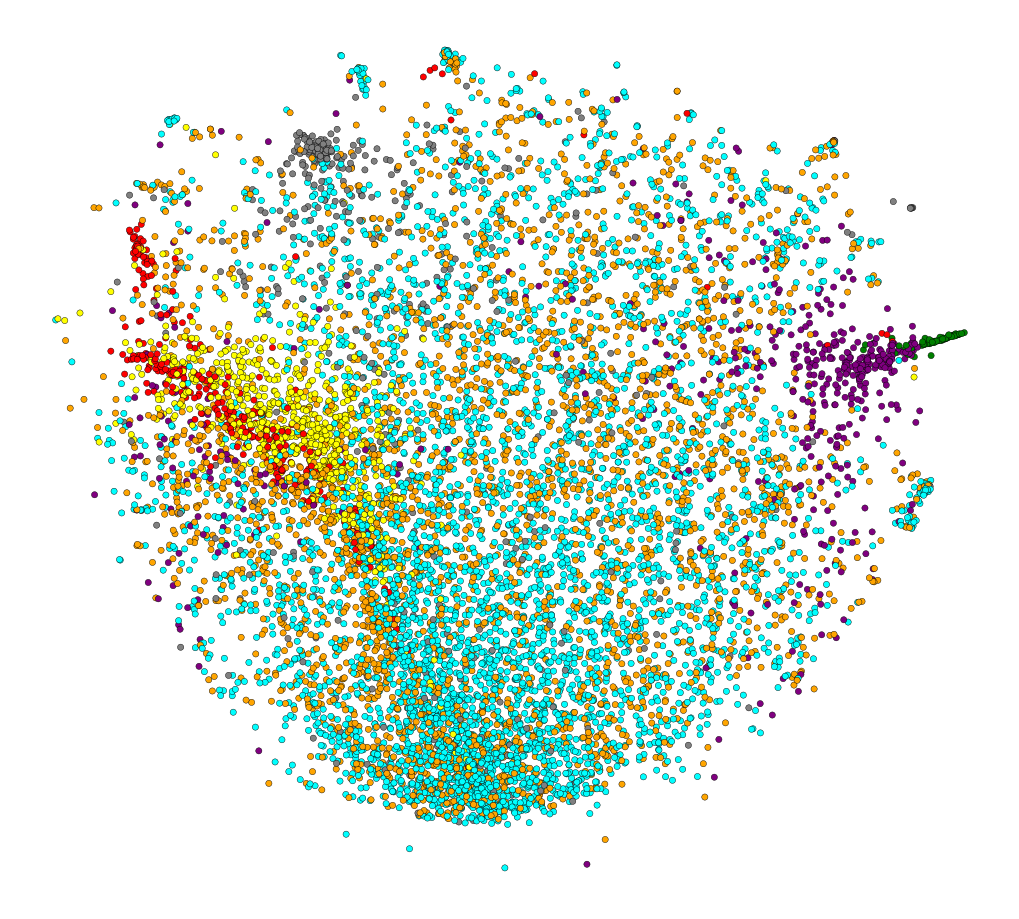

In [57]:
fig = figure(figsize=(10, 10))
ax = axes(frameon=False)
setp(ax, xticks=(), yticks=())
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
scatter(X_embedded2[:, 0], X_embedded2[:, 1], c=colors1)

# FILTER DATA BY V GENE V20-1

In [65]:
out_file = open("D2_vgenes_all.txt", 'w')
with open("D2_pandas_cdr_Vgene.txt", 'r') as f:
    for l in f.readlines():
        l1 = l.split("\t")
        if l.find("V-gene") == -1:
            vgene = list(filter(None, l1[0].split(",")))
            cdr = l1[1].strip()
            for el in vgene:
                out_file.write(cdr+"\t"+el+"\n")
                
out_file.close()       

In [71]:
D2Vgeges = pd.read_csv("D2_vgenes_all.txt", sep="\t", header=None)
filtV = D2Vgeges[D2Vgeges[1] == 'TRBV20-1']
filtV_sp = filtV[0].tolist()

In [72]:
cluster_data[0:4]

a               b    weight
0   CASSPGIQETQYF  CASSLDPGGETQYF  1.286103
1  CASSVQGGSYEQYF  CASSLDPGGETQYF  1.685884
2   CASSRGSTDTQYF  CASSLDPGGETQYF  1.195442
3  CAWSVGSGANVLTF  CASSLDPGGETQYF  1.501279

In [73]:
cluster_data_a = cluster_data[cluster_data['a'].isin(filtV_sp)]
cluster_data_ab = cluster_data_a[cluster_data_a['b'].isin(filtV_sp)]
len(cluster_data_ab)

830

In [74]:
len(cluster_data_a)

16898

In [75]:
allcdr = list(set(cluster_data_ab['a'].tolist() + cluster_data_ab['b'].tolist()))

#make numeric values fir each cdr_aa
vertexes =  pd.DataFrame(allcdr)
vertexes['num'] = vertexes.index
vertexes.columns = ['a', 'numa']

vertexes2 =  pd.DataFrame(allcdr)
vertexes2['num1'] = vertexes2.index
vertexes2.columns = ['b', 'numb']

a_pd = cluster_data.merge(vertexes, on='a', how='inner')
ab_pd = a_pd.merge(vertexes2, on='b', how='inner')
ab_pd[0:5]
cluster_data_num = ab_pd[['numa', 'numb', 'weight']]

cluster_data_num[0:5]

numa  numb    weight
0   263   366  1.418172
1   273   366  1.506808
2   166   366  2.012571
3   283   366  2.096429
4   263   350  1.265086

In [76]:
kek4 = read_data_file_as_coo_matrix(cluster_data_num, 'custom')

#symmetric
def symmetrize(a):
    return a + a.T - np.diag(a.diagonal())

lol4 = symmetrize(kek4)

pd_lol4 = pd.DataFrame(lol4, index = vertexes['a'].tolist())
pd_lol4.columns = vertexes['a'].tolist()
pd_lol4['cdr'] = pd_lol4.index
pd_lol4[0:5]

CSASASSYNEQFF  CSAGPYEQYF  CSASGLQETQYF  CSASPDSYEQYF  \
CSASASSYNEQFF            0.0         0.0           0.0           0.0   
CSAGPYEQYF               0.0         0.0           0.0           0.0   
CSASGLQETQYF             0.0         0.0           0.0           0.0   
CSASPDSYEQYF             0.0         0.0           0.0           0.0   
CSASVGNTEAFF             0.0         0.0           0.0           0.0   

               CSASVGNTEAFF  CSARDRGRETQYF  CSARGGTYNEQFF  CSARTSGSTDTQYF  \
CSASASSYNEQFF           0.0            0.0            0.0             0.0   
CSAGPYEQYF              0.0            0.0            0.0             0.0   
CSASGLQETQYF            0.0            0.0            0.0             0.0   
CSASPDSYEQYF            0.0            0.0            0.0             0.0   
CSASVGNTEAFF            0.0            0.0            0.0             0.0   

               CSASPADTQYF  CSARVSGNTIYF      ...        CSARGALNTEAFF  \
CSASASSYNEQFF          0.0           0.0      ...                  0.0   
CSAGPYEQYF             0.0           0.0      ...                  0.0   
CSASGLQETQYF           0.0           0.0      ...                  0.0   
CSASPDSYEQYF           0.0           0.0      ...                  0.0   
CSASVGNTEAFF           0.0           0.0      ...                  0.0   

               CSAQHQETQYF  CSASGTANYGYTF  CSASGGAGETQYF  CSARVTDTQYF  \
CSASASSYNEQFF          0.0            0.0            0.0     0.000000   
CSAGPYEQYF             0.0            0.0            0.0     1.737154   
CSASGLQETQYF           0.0            0.0            0.0     0.000000   
CSASPDSYEQYF           0.0            0.0            0.0     0.000000   
CSASVGNTEAFF           0.0            0.0            0.0     0.000000   

               CSASKGNQPQHF  CSARGAGNQPQHF  CSARDRVYGYTF  CSARLSYEQYF  \
CSASASSYNEQFF           0.0            0.0           0.0          0.0   
CSAGPYEQYF              0.0            0.0           0.0          0.0   
CSASGLQETQYF            0.0            0.0           0.0          0.0   
CSASPDSYEQYF            0.0            0.0           0.0          0.0   
CSASVGNTEAFF            0.0            0.0           0.0          0.0   

                         cdr  
CSASASSYNEQFF  CSASASSYNEQFF  
CSAGPYEQYF        CSAGPYEQYF  
CSASGLQETQYF    CSASGLQETQYF  
CSASPDSYEQYF    CSASPDSYEQYF  
CSASVGNTEAFF    CSASVGNTEAFF  

[5 rows x 396 columns]

In [79]:
clustering = cluster.SpectralClustering(7, affinity='precomputed',eigen_solver='arpack')
clusters = clustering.fit_predict(pd_lol4.ix[:, 0:-1])

classes=[]
for k in range(7):
    indices = [i for i, x in enumerate(clusters) if x == k]
    cla = pd.DataFrame(indices)
    cla['class'] = k
    cla.columns = ['num', 'class']
    classes.append(cla)
    
kik = reduce(lambda x, y: pd.concat([x, y]), classes)    

vertexes3 =  pd.DataFrame(allcdr)
vertexes3['num'] = vertexes.index
vertexes3.columns = ['cdr', 'num']

vert_class4 = vertexes3.merge(kik, on='num', how='inner')
vert_class4[0:5]

/home/fedorovaad/anaconda3/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:217: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


cdr  num  class
0  CSASASSYNEQFF    0      6
1     CSAGPYEQYF    1      6
2   CSASGLQETQYF    2      0
3   CSASPDSYEQYF    3      6
4   CSASVGNTEAFF    4      6

In [84]:
colors4 = []
colors = vert_class4['class'].tolist()
for el in colors:
    if el == 0:
        colors4.append('red')
    elif el == 1:
        colors4.append('orange')
    elif el == 2:
        colors4.append('yellow')
    elif el == 3:
        colors4.append('purple')
    elif el == 4:
        colors4.append('green')
    elif el == 5:
        colors4.append('cyan')
    else:
        colors4.append('grey')

colors4[0:5]              

['grey', 'grey', 'red', 'grey', 'grey']

In [85]:
matr4 = np.matrix(pd_lol4.drop(['cdr'], axis=1))
matr4

matrix([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [83]:
X_reduced4 = TruncatedSVD(n_components=50, random_state=0).fit_transform(matr4)
X_embedded4 = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced4)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 395 / 395
[t-SNE] Mean sigma: 0.550208
[t-SNE] Iteration 25: error = 0.8449643, gradient norm = 0.0213304
[t-SNE] Iteration 50: error = 0.9092481, gradient norm = 0.0187097
[t-SNE] Iteration 75: error = 0.7194557, gradient norm = 0.0148124
[t-SNE] Iteration 100: error = 0.7813873, gradient norm = 0.0161606
[t-SNE] Error after 100 iterations with early exaggeration: 0.781387
[t-SNE] Iteration 125: error = 0.7303327, gradient norm = 0.0119148
[t-SNE] Iteration 150: error = 0.7931641, gradient norm = 0.0141796
[t-SNE] Iteration 175: error = 0.9599395, gradient norm = 0.0151480
[t-SNE] Iteration 175: did not make any progress during the last 30 episodes. Finished.
[t-SNE] Error after 175 iterations: 0.959939


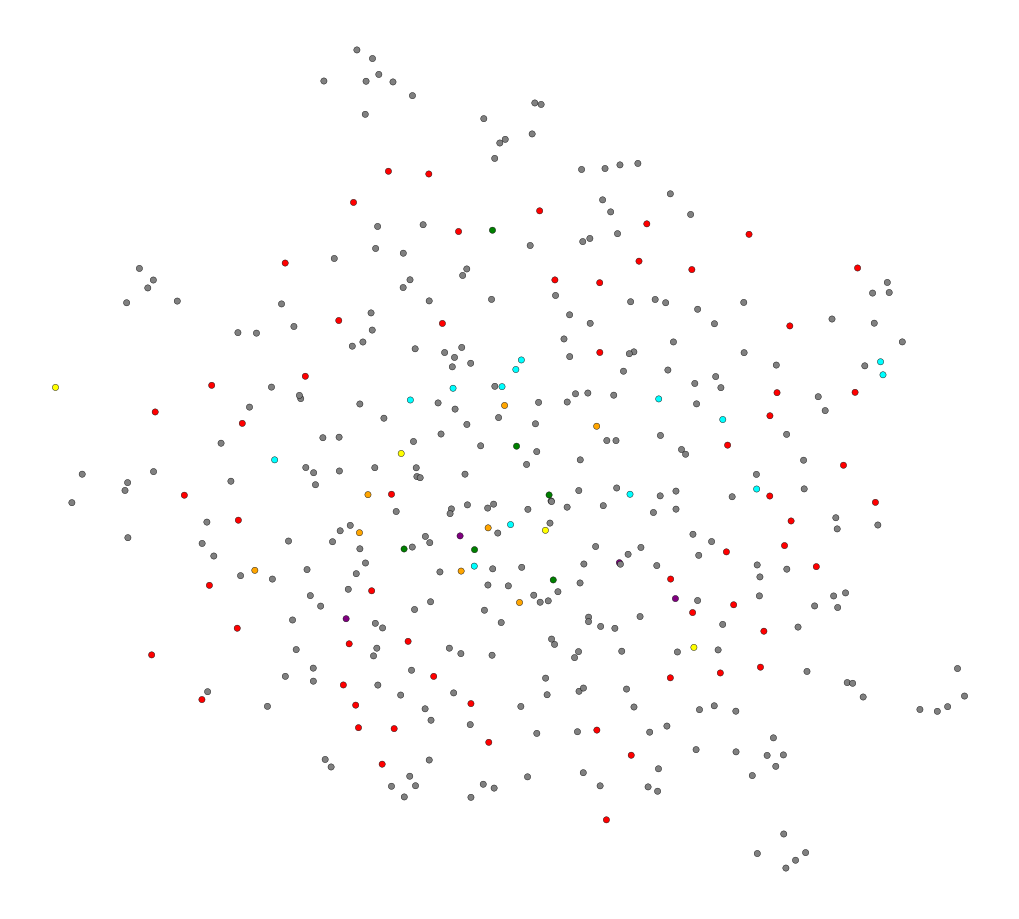

In [86]:
fig = figure(figsize=(10, 10))
ax = axes(frameon=False)
setp(ax, xticks=(), yticks=())
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
scatter(X_embedded4[:, 0], X_embedded4[:, 1], c=colors4)